## Task: Program to implement K Nearest Neighbor classifier and Regressor and also evaluate the model.
**DATASETS:**
- House Price Dataset - For Regression
- Titanic Dataset - For Classification

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml

house_price_data = fetch_openml(name='house_prices', version=1)

df = pd.DataFrame(house_price_data.data, columns=house_price_data.feature_names)
df['SalePrice'] = house_price_data.target

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded = df_encoded.dropna()

X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3133097172.855802


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
titanic = sns.load_dataset('titanic')

titanic = titanic.dropna(subset=['age', 'embarked'])
titanic = pd.get_dummies(titanic, drop_first=True)

X = titanic.drop(columns=['survived'])
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)
y_pred = knn_classifier.predict(X_test_scaled)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.95      0.92        80
           1       0.93      0.84      0.88        63

    accuracy                           0.90       143
   macro avg       0.91      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143



## Task :Develop a program for handling missing values in diabetes dataset using KNN imputer
**DATASET:**
- Pima Indians Diabetes Database


In [72]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np

df = pd.read_csv("vr23-adsalab/3-1/diabetes.csv")
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[cols] = df[cols].replace(0, np.nan)

print("Before imputation, missing values:")
print(df.isnull().sum())

knn_imputer = KNNImputer(n_neighbors=5)


df_imputed = df.copy()  # Create a copy of the original dataframe to keep it intact
df_imputed[df_imputed.columns] = knn_imputer.fit_transform(df_imputed)

print("\nAfter imputation, missing values:")
print(df_imputed.isnull().sum())

print("\nFirst few rows of imputed dataset:")
print(df_imputed.head())

Before imputation, missing values:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

After imputation, missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

First few rows of imputed dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.0  33.6   
1          1.0     85.0           66.0           29.0     58.6  26.6   
2          8.0    183.0           64.0           25.8    164.6  23.3   
3          1.0     89.

## Task
1. Analyze the sample data by plotting uni-variate plots(histograms, density plots, box plots and whisker plots)
2. Analyze the sample data by plotting multi-variate plots(correlation matrix plot, scatter plot matrix)

**Datasets:**
- Iris
- Pima indian diabetes


UNI VARIATE PLOTS:


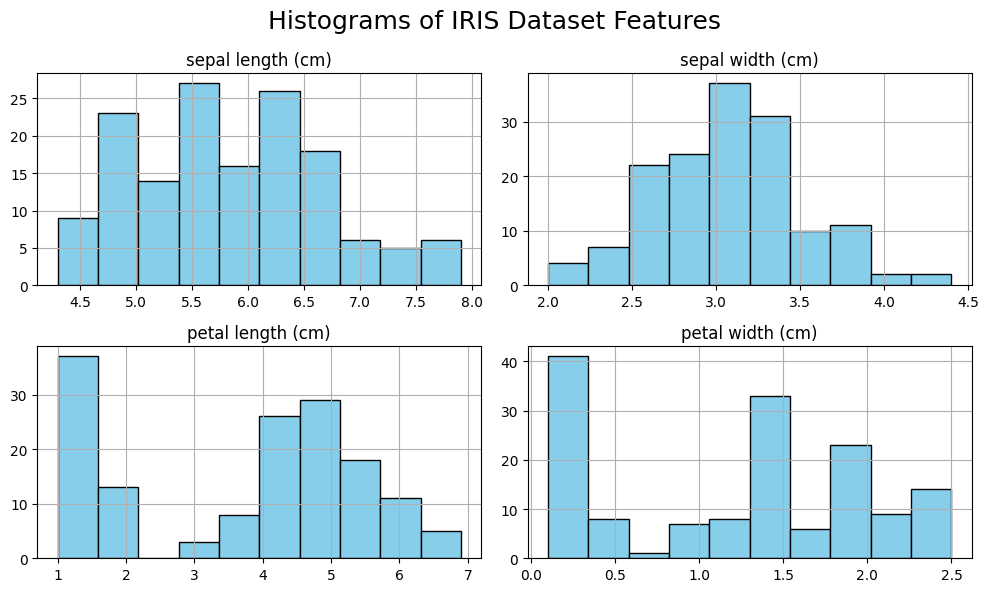

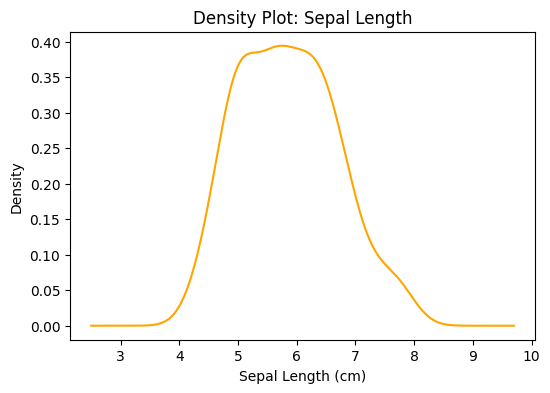

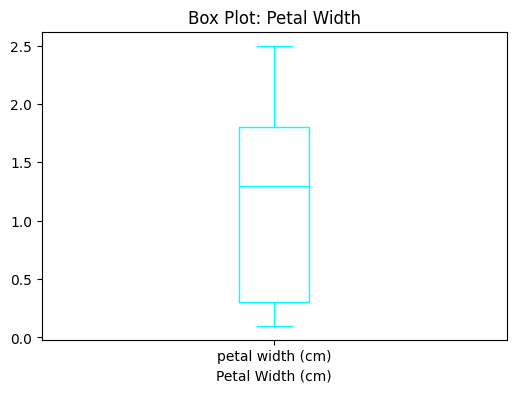

MULTI VARIATE PLOTS:


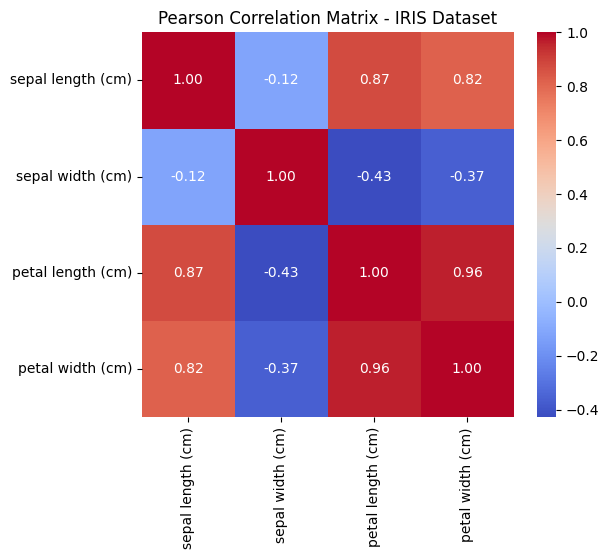

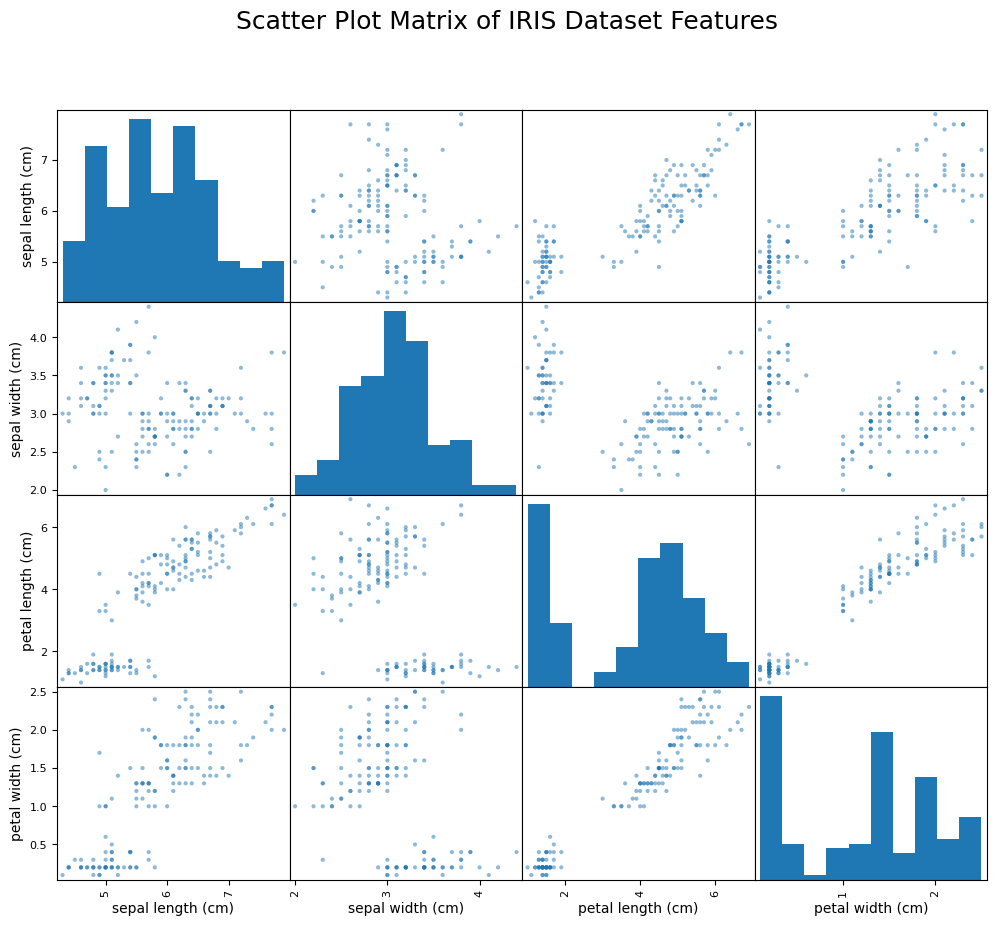

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_iris

# Load IRIS dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

print("UNI VARIATE PLOTS:")

# 1. Histogram plots
df.drop(columns=["target"]).hist(figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of IRIS Dataset Features", fontsize=18)
plt.tight_layout()
plt.show()

# 2. Density plot for Sepal Length
df["sepal length (cm)"].plot(kind='density', figsize=(6, 4), color='orange')
plt.title("Density Plot: Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.show()

# 3. Box plot for Petal Width
df["petal width (cm)"].plot(kind='box', figsize=(6, 4), color='cyan')
plt.title("Box Plot: Petal Width")
plt.xlabel("Petal Width (cm)")
plt.show()


print("MULTI VARIATE PLOTS:")


corr_matrix = df.drop(columns=["target"]).corr(method="pearson")
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix - IRIS Dataset")
plt.show()

# 5. Scatter plot matrix
plt.rcParams['figure.figsize'] = [12, 10]
scatter_matrix(df.drop(columns=["target"]), alpha=0.5, diagonal='hist')
plt.suptitle("Scatter Plot Matrix of IRIS Dataset Features", fontsize=18)
plt.show()


UNI VARIATE PLOTS:


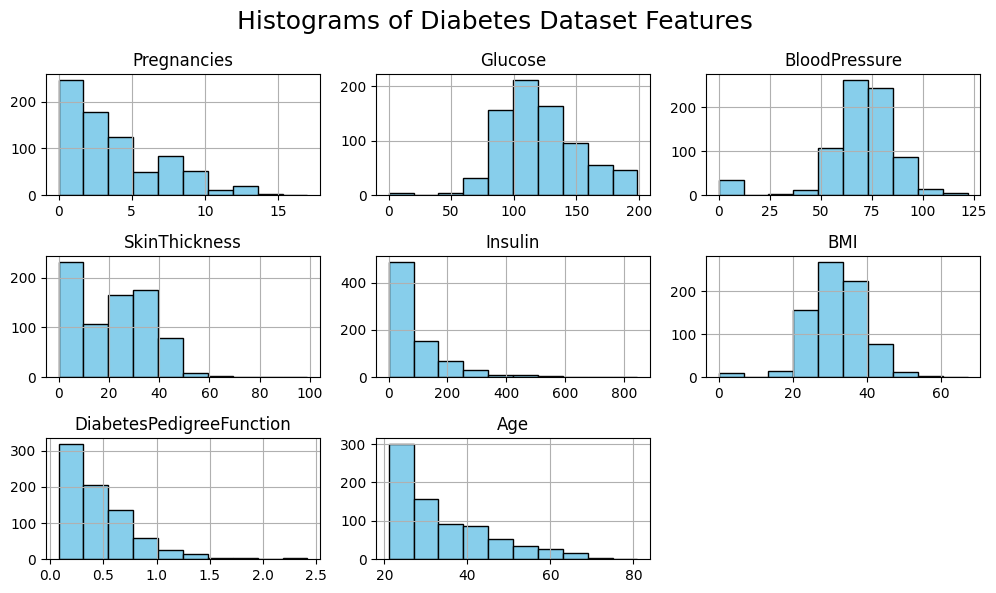

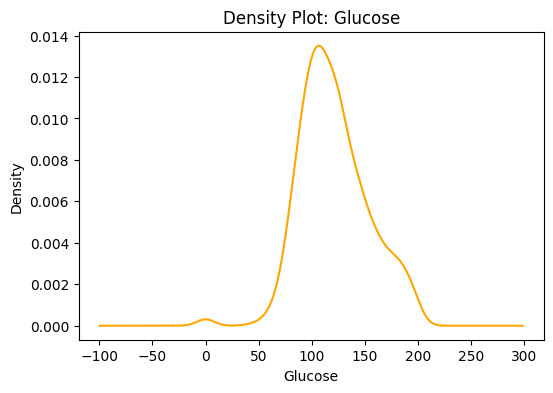

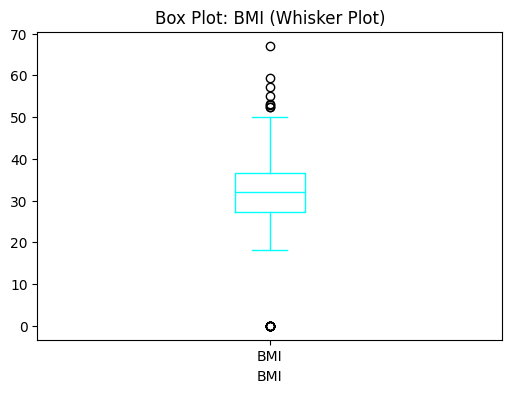

MULTI VARIATE PLOTS:


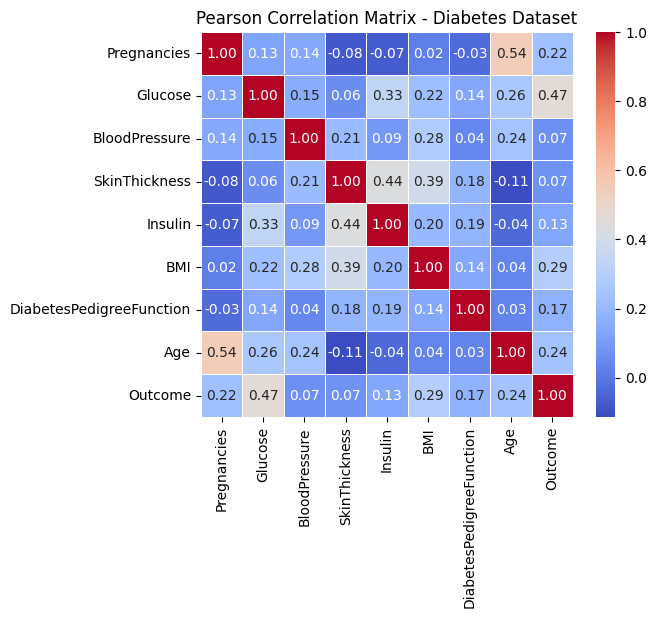

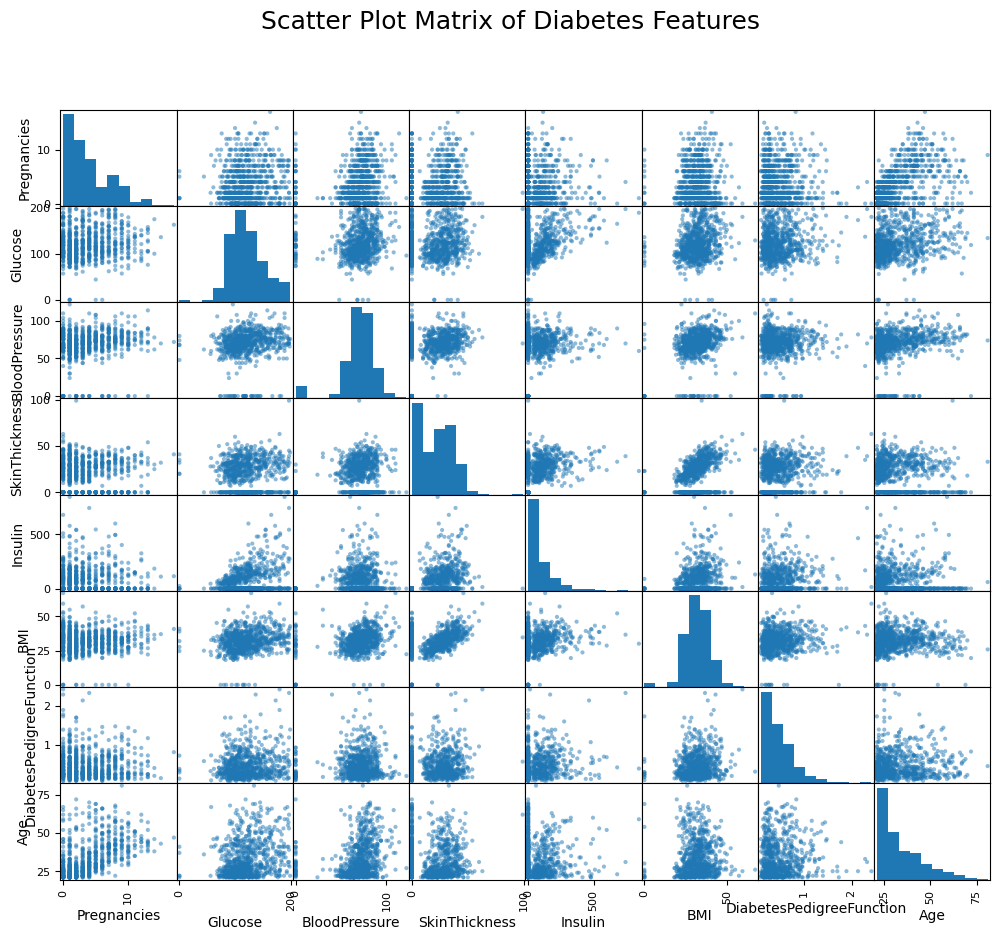

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Load the dataset

diabetes = pd.read_csv("vr23-adsalab/3-1/diabetes.csv")

print("UNI VARIATE PLOTS:")
diabetes.drop(columns=['Outcome']).hist(figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Diabetes Dataset Features", fontsize=18)
plt.tight_layout()
plt.show()

# 2. Density Plot for 'Glucose' feature
diabetes['Glucose'].plot(kind='density', figsize=(6, 4), color='orange')
plt.title('Density Plot: Glucose')
plt.xlabel('Glucose')
plt.show()

# 3. Box Plot (Whisker Plot) for 'BMI' feature
# Box plot inherently includes whiskers to show the spread of the data
diabetes['BMI'].plot(kind='box', figsize=(6, 4), color='cyan')
plt.title('Box Plot: BMI (Whisker Plot)')
plt.xlabel('BMI')
plt.show()


print("MULTI VARIATE PLOTS:")
corr_matrix = diabetes.corr(method='pearson')
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Matrix - Diabetes Dataset')
plt.show()

# 5. Scatter Plot Matrix of Diabetes Features (excluding 'Outcome')
plt.rcParams['figure.figsize'] = [12, 10]  # Set default figure size for scatter matrix
scatter_matrix(diabetes.drop(columns=['Outcome']), alpha=0.5, diagonal='hist')
plt.suptitle("Scatter Plot Matrix of Diabetes Features", fontsize=18)
plt.show()


## Task: Program to implement Principle Component Analysis on sample dataset.

Original shape: (6, 4)
Original Data:
 [[2.5 2.4 0.5 1.2]
 [0.5 0.7 1.5 0.9]
 [2.2 2.9 0.3 1.3]
 [1.9 2.2 0.4 1. ]
 [3.1 3.  0.2 1.4]
 [2.3 2.7 0.7 1.1]]

Principal Components after reduction:
 [[-0.3726721  -0.22627078]
 [ 2.44613492 -0.07560172]
 [-0.5785686   0.34636146]
 [ 0.14745716  0.14388521]
 [-1.29051737 -0.22745447]
 [-0.35183401  0.03908029]]


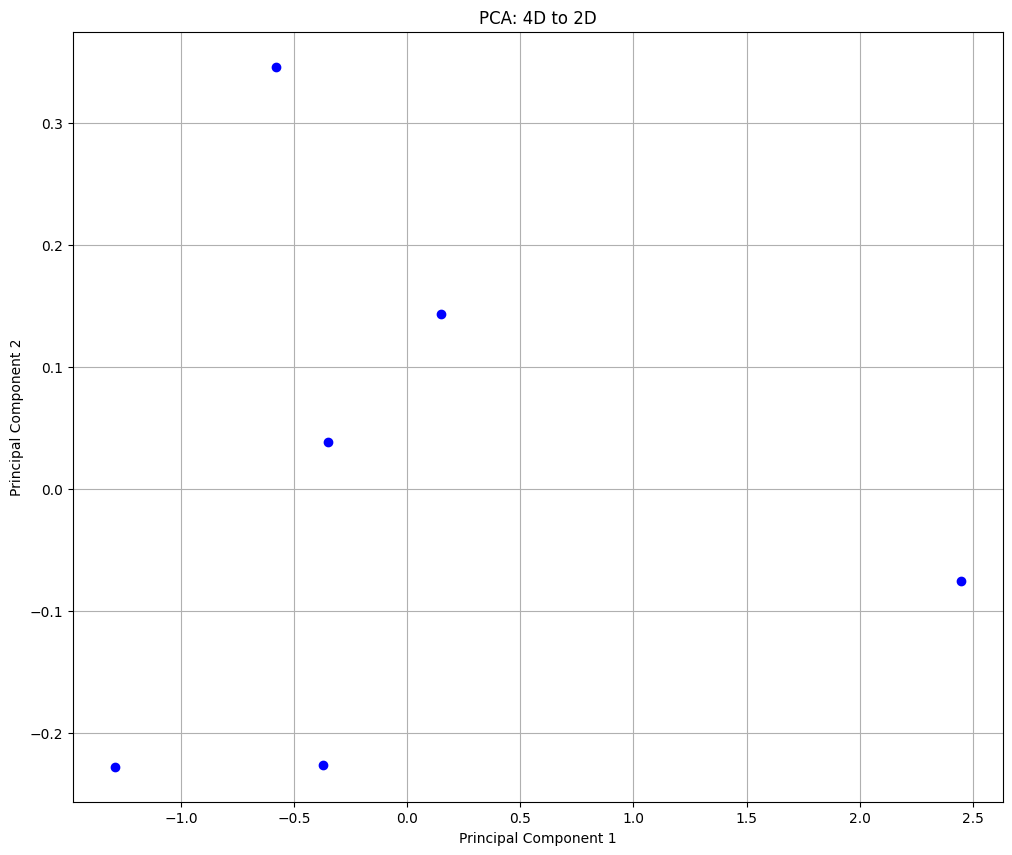

In [80]:
import numpy as np
import matplotlib.pyplot as plt


X = np.array([
    [2.5, 2.4, 0.5, 1.2],
    [0.5, 0.7, 1.5, 0.9],
    [2.2, 2.9, 0.3, 1.3],
    [1.9, 2.2, 0.4, 1.0],
    [3.1, 3.0, 0.2, 1.4],
    [2.3, 2.7, 0.7, 1.1]
], dtype=float)

print("Original shape:", X.shape)


X_mean = np.mean(X, axis=0)
X_centered = X - X_mean


cov_matrix = np.cov(X_centered, rowvar=False)


eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)


idx = np.argsort(eigenvalues)[::-1]
eigenvectors_s = eigenvectors[:, idx]
eigenvalues_s = eigenvalues[idx]


k = 2
components = eigenvectors_s[:, :k]
X_r = X_centered @ components

print("Original Data:\n", X)
print("\nPrincipal Components after reduction:\n", X_r)

plt.scatter(X_r[:, 0], X_r[:, 1], color='blue')
plt.title('PCA: 4D to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


## Task: PCA ON IRIS

Reduced Data Shape: (150, 2)
Explained Variance Ratio: [0.72962445 0.22850762]


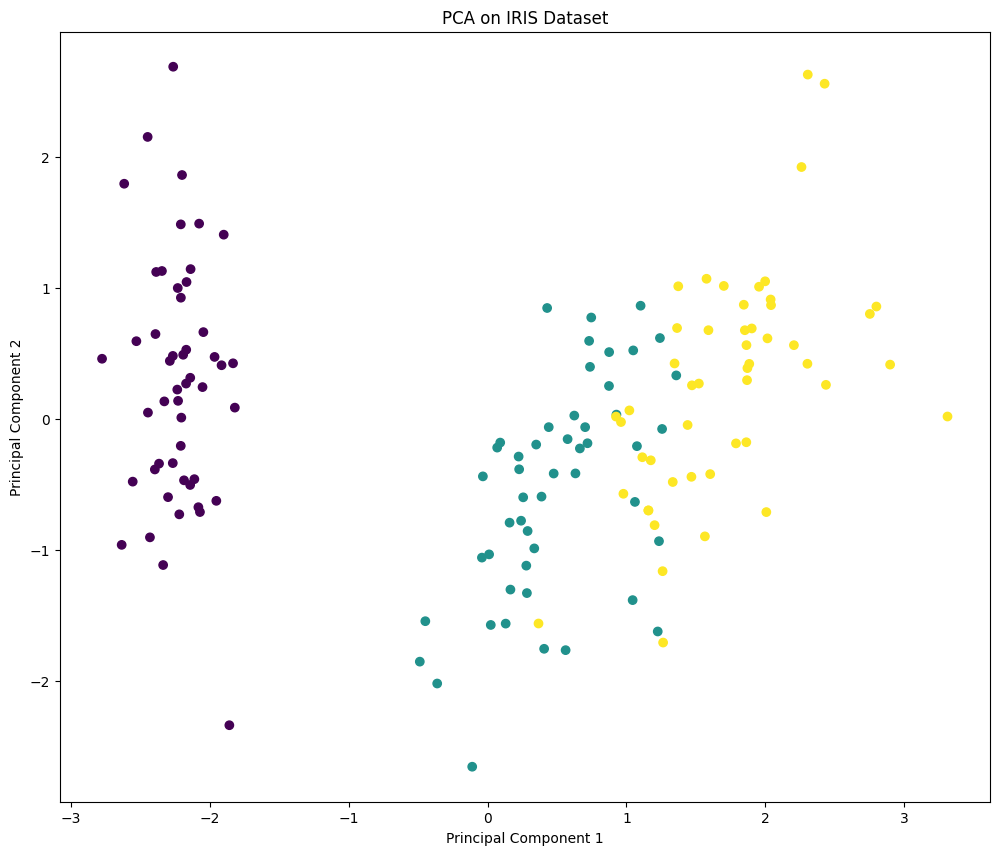

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

print("Reduced Data Shape:", X_pca.shape)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on IRIS Dataset")
plt.show()


## TASK: Program to implement Decision Tree learning algorithm ad evaluate the metrics on sample dataset.
**DATASET: iris**


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



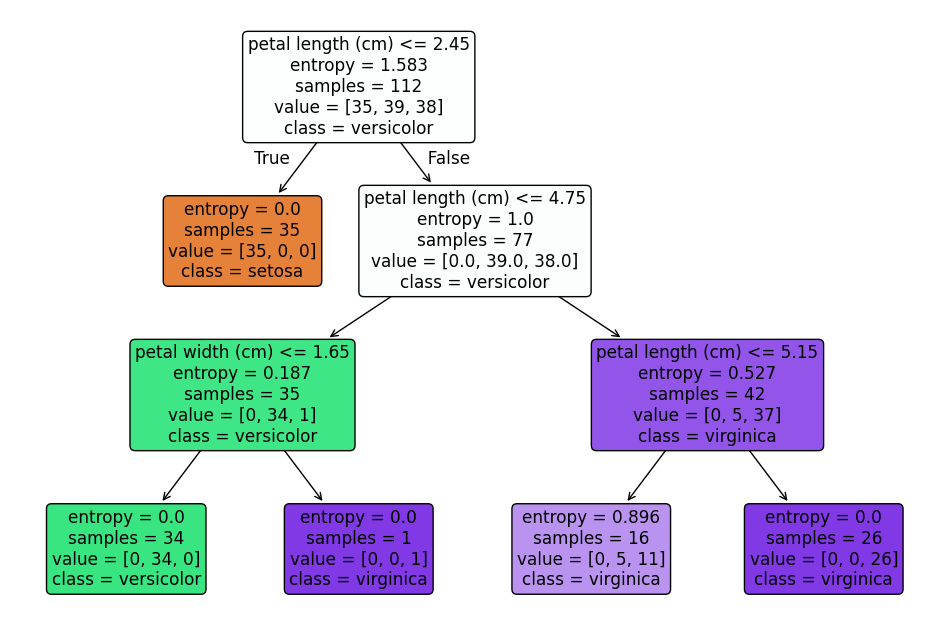

In [84]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

x, y = df, iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

model = DecisionTreeClassifier(criterion='entropy', max_depth = 3)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()


## Task: Implement Apriori algorithm for the below sample dataset.
DATASET:https://acesse.one/y4nYz

In [86]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

dataset = pd.read_csv('vr23-adsalab/3-1/Groceries_dataset.csv')
df = pd.DataFrame(dataset)

basket = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions = basket['itemDescription'].tolist()

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print("Total Frequent Itemsets:", frequent_itemsets.shape[0])
print(frequent_itemsets.head())


rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print("Association Rules:", rules.shape[0])
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


Total Frequent Itemsets: 69
    support        itemsets
0  0.021386      (UHT-milk)
1  0.033950          (beef)
2  0.021787       (berries)
3  0.016574     (beverages)
4  0.045312  (bottled beer)
Association Rules: 4
          antecedents   consequents   support  confidence      lift
0  (other vegetables)  (whole milk)  0.014837    0.121511  0.769430
1        (rolls/buns)  (whole milk)  0.013968    0.126974  0.804028
2              (soda)  (whole milk)  0.011629    0.119752  0.758296
3            (yogurt)  (whole milk)  0.011161    0.129961  0.822940


## Task: Program to implement perceptron for different learning task and evaluate the algorithm.(ANN-Diabetes dataset).
**DATASET:
Pima Indians Diabetes Database**


In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

diabetes = pd.read_csv('vr23-adsalab/3-1/diabetes.csv')

X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(units=12, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print("Predictions:", y_pred[:10])
print("Actual Values:", y_test[:10].values)

Epoch 1/10


C:\Users\cherr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6531 - loss: 0.6793 - val_accuracy: 0.6429 - val_loss: 0.6826
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6531 - loss: 0.6673 - val_accuracy: 0.6429 - val_loss: 0.6723
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6531 - loss: 0.6557 - val_accuracy: 0.6429 - val_loss: 0.6631
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6531 - loss: 0.6450 - val_accuracy: 0.6429 - val_loss: 0.6546
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6531 - loss: 0.6330 - val_accuracy: 0.6429 - val_loss: 0.6438
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6531 - loss: 0.6198 - val_accuracy: 0.6429 - val_loss: 0.6321
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6531 - loss: 0.6065 - val_accuracy: 0.6429 - val_loss: 0.6206
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6531 - loss: 0.5926 - val_accuracy: 0.6429 - val_loss: 0.6104
Ep

# Task: Program to implement Linear Regression and evaluate the metrics for the Salary dataset (Simple Linear Regression) and House Price Dataset (Multiple Linear Regression)

**DATASET:**
1. salary-datacsv
2. housing-prices-dataset


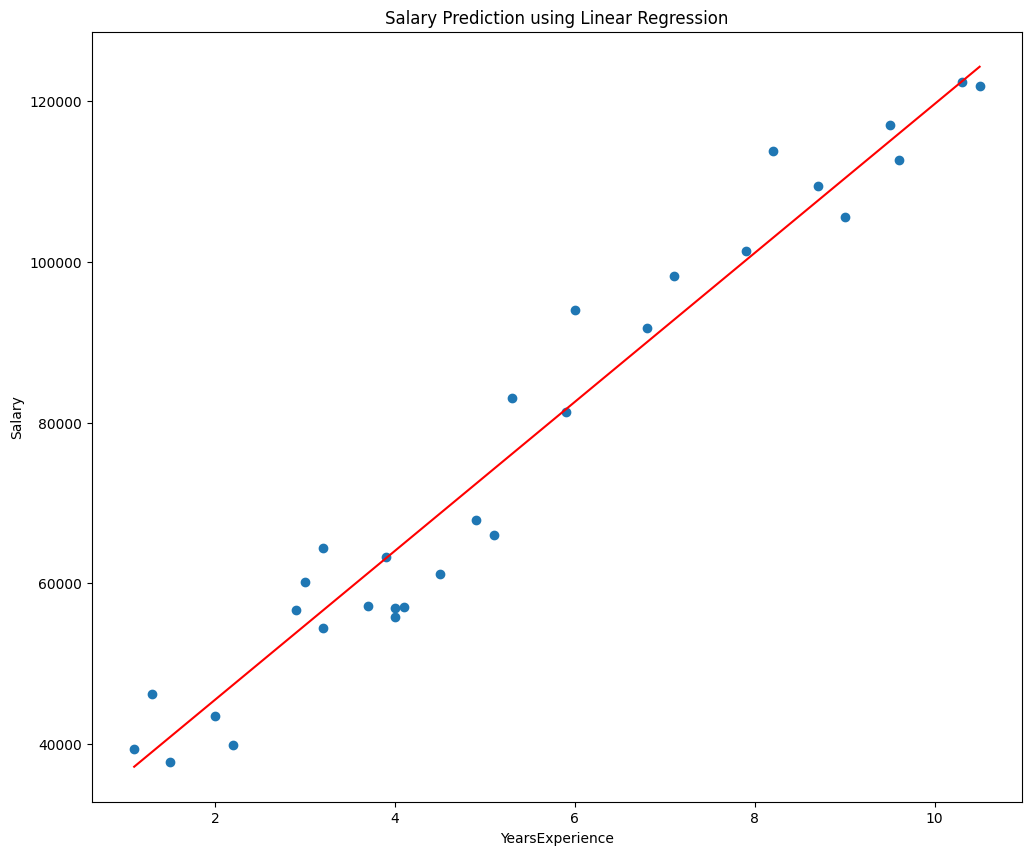

Salary = 9262.38 * YearsExperience + 26999.91


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("vr23-adsalab/3-1/salary_data.csv")
X = df[["YearsExperience"]]
y = df["Salary"]

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2)

model = LinearRegression().fit(Xtr, ytr)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color="red")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Salary Prediction using Linear Regression")
plt.show()

print("Salary = {:.2f} * YearsExperience + {:.2f}".format(
    model.coef_[0], model.intercept_))


In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("vr23-adsalab/3-1/Housing.csv").select_dtypes(include=[np.number]).dropna()
X = df.drop("price", axis=1)
y = df["price"]

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2)

model = LinearRegression().fit(Xtr, ytr)

eq = "HousePrice = "
eq += " + ".join([f"{c:.2f}*{f}" for c, f in zip(model.coef_, X.columns)])
eq += f" + {model.intercept_:.2f}"

print(eq)


HousePrice = 307.18*area + 235147.08*bedrooms + 1220514.55*bathrooms + 483617.54*stories + 374320.89*parking + -180308.07


## Task: Program to implement KMeans algorithm and evaluate the algorithm.

**DATASETS:
 Mall Customers**
 


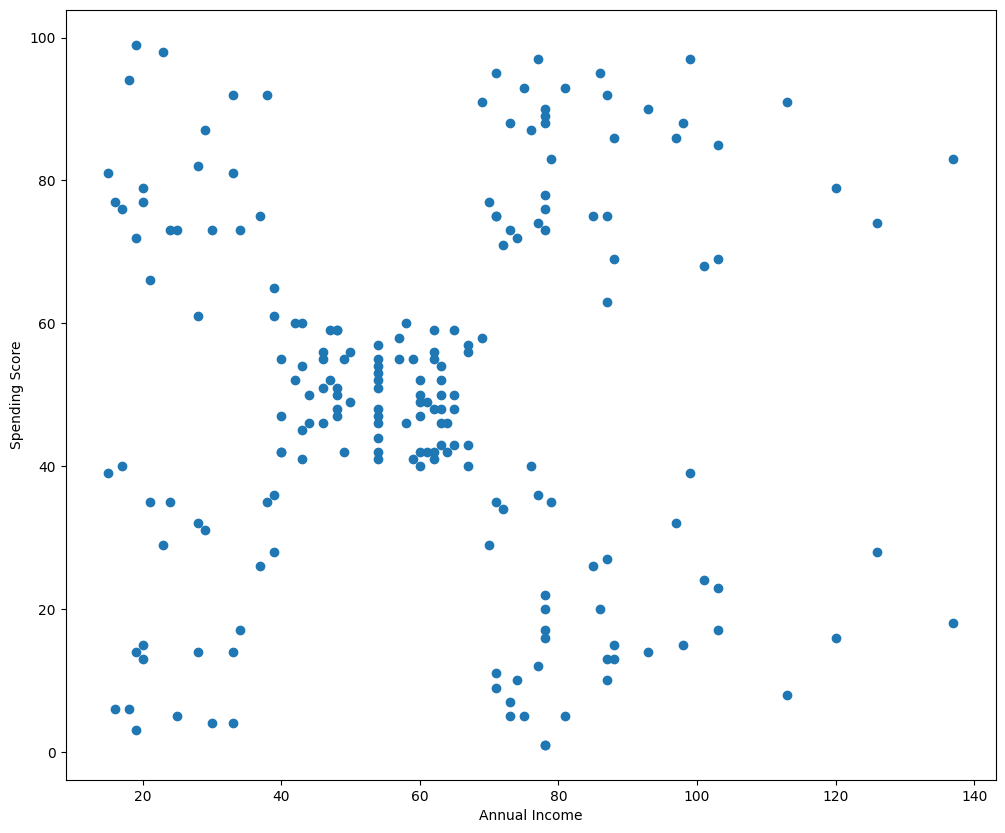

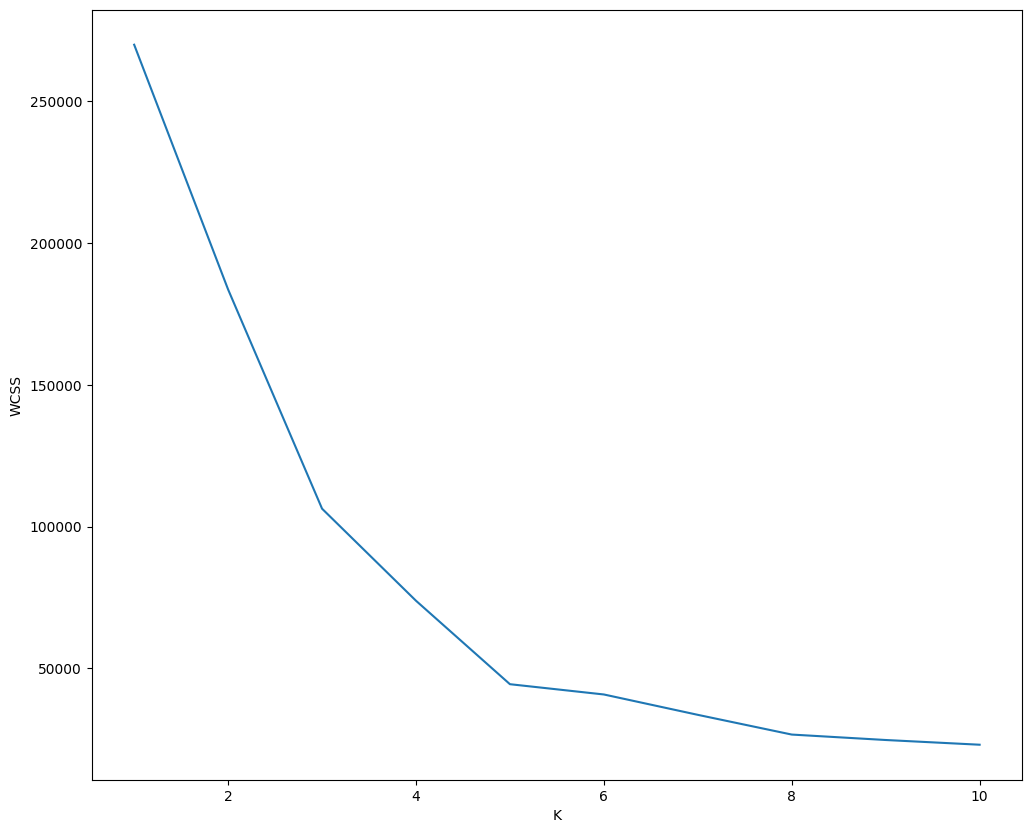

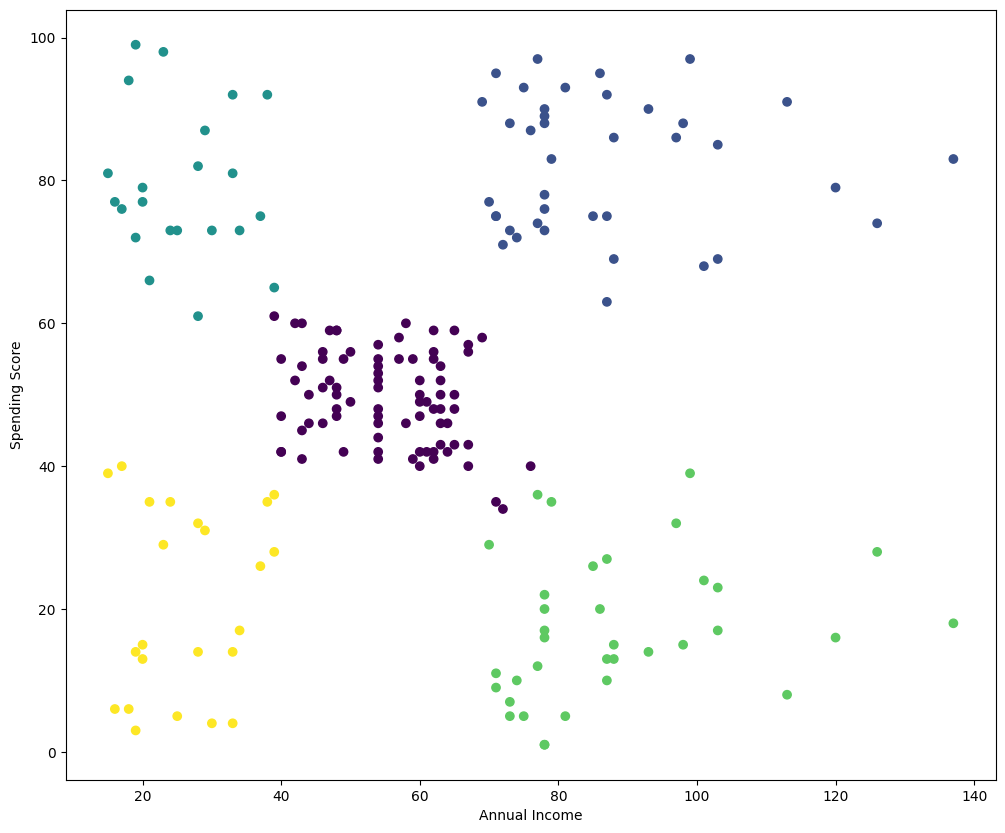

Cluster 0:
[ 44  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 127 133 143]
------------------------------
Cluster 1:
[124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
------------------------------
Cluster 2:
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
------------------------------
Cluster 3:
[125 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
------------------------------
Cluster 4:
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
------------------------------


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("vr23-adsalab/3-1/Mall_Customers.csv")
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


wcss = []
for k in range(1,11):
    wcss.append(KMeans(n_clusters=k, random_state=42).fit(X).inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()


km = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = km.fit_predict(X)


plt.scatter(X.iloc[:,0], X.iloc[:,1], c=df["Cluster"])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


for i in range(5):
    print(f"Cluster {i}:")
    print(df[df["Cluster"] == i]["CustomerID"].values)
    print("-" * 30)


## TASK 10: Random Forest SVM Navie Bayes

In [106]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(Xtr, ytr)

print("Accuracy:", accuracy_score(yte, model.predict(Xte)))


Accuracy: 0.9824561403508771


In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv("vr23-adsalab/3-1/titanic.csv")

df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df.drop(["Name","Ticket","Cabin","Embarked"], axis=1, inplace=True)

X = df.drop("Survived", axis=1)
y = df["Survived"]

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2)

model = SVC()
model.fit(Xtr, ytr)

print("Accuracy:", accuracy_score(yte, model.predict(Xte)))


Accuracy: 0.6703910614525139


In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

df = pd.read_csv("vr23-adsalab/3-1/BankNotes.csv")

X = df.drop("class", axis=1)
y = df["class"]

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2)

model = GaussianNB()
model.fit(Xtr, ytr)

print("Accuracy:", accuracy_score(yte, model.predict(Xte)))


Accuracy: 0.8581818181818182
